<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data(y_hat)_multi_delta_(_1_2)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-1.2'

In [4]:
os.listdir(base_path)

['data_multi_delta_-1.2_n20.csv',
 'data_multi_delta_-1.2_n30.csv',
 'data_multi_delta_-1.2_n60.csv',
 'data_multi_delta_-1.2_n120.csv',
 'data_multi_delta_-1.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-1.2_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,42.721432,39.586314,-0.002437,92.305309,92.301890,0.003418
1,0.0,1.0,60.928514,61.478576,-0.031356,132.375734,132.410371,-0.034637
2,0.0,2.0,87.736888,42.048635,0.059898,139.845421,139.789539,0.055883
3,0.0,3.0,84.102697,80.713229,0.067991,174.883917,174.828711,0.055205
4,0.0,4.0,43.938795,61.616016,-0.093854,115.460957,115.554629,-0.093672
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,39.213600,66.056389,0.126197,115.396185,115.268118,0.128067
249996,999.0,246.0,94.970335,91.225141,-0.023340,196.172136,196.188451,-0.016315
249997,999.0,247.0,68.796997,71.428964,-0.040697,150.185264,150.220565,-0.035301
249998,999.0,248.0,31.087391,43.454923,-0.122686,84.419628,84.539319,-0.119691


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,42.721432,39.586314,-0.002437,92.305309,92.301890,0.003418
1,0.0,1.0,60.928514,61.478576,-0.031356,132.375734,132.410371,-0.034637
2,0.0,2.0,87.736888,42.048635,0.059898,139.845421,139.789539,0.055883
3,0.0,3.0,84.102697,80.713229,0.067991,174.883917,174.828711,0.055205
4,0.0,4.0,43.938795,61.616016,-0.093854,115.460957,115.554629,-0.093672
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,39.213600,66.056389,0.126197,115.396185,115.268118,0.128067
249996,999.0,246.0,94.970335,91.225141,-0.023340,196.172136,196.188451,-0.016315
249997,999.0,247.0,68.796997,71.428964,-0.040697,150.185264,150.220565,-0.035301
249998,999.0,248.0,31.087391,43.454923,-0.122686,84.419628,84.539319,-0.119691


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    42.721432  39.586314 -0.002437   92.305309   92.301890  0.003418
      1.0    60.928514  61.478576 -0.031356  132.375734  132.410371 -0.034637
      2.0    87.736888  42.048635  0.059898  139.845421  139.789539  0.055883
      3.0    84.102697  80.713229  0.067991  174.883917  174.828711  0.055205
      4.0    43.938795  61.616016 -0.093854  115.460957  115.554629 -0.093672
...                ...        ...       ...         ...         ...       ...
999.0 245.0  39.213600  66.056389  0.126197  115.396185  115.268118  0.128067
      246.0  94.970335  91.225141 -0.023340  196.172136  196.188451 -0.016315
      247.0  68.796997  71.428964 -0.040697  150.185264  150.220565 -0.035301
      248.0  31.087391  43.454923 -0.122686   84.419628   84.539319 -0.119691
      249.0  81.576872  22.188392  0.181712  113.946976  113.753237  0.193739

[250000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    42.721432  39.586314 -0.002437   92.305309   92.301890  0.003418
      1.0    60.928514  61.478576 -0.031356  132.375734  132.410371 -0.034637
      2.0    87.736888  42.048635  0.059898  139.845421  139.789539  0.055883
      3.0    84.102697  80.713229  0.067991  174.883917  174.828711  0.055205
      4.0    43.938795  61.616016 -0.093854  115.460957  115.554629 -0.093672
...                ...        ...       ...         ...         ...       ...
999.0 245.0  39.213600  66.056389  0.126197  115.396185  115.268118  0.128067
      246.0  94.970335  91.225141 -0.023340  196.172136  196.188451 -0.016315
      247.0  68.796997  71.428964 -0.040697  150.185264  150.220565 -0.035301
      248.0  31.087391  43.454923 -0.122686   84.419628   84.539319 -0.119691
      249.0  81.576872  22.188392  0.181712  113.946976  113.753237  0.193739

[250000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,42.721432,39.586314,-0.002437,92.305309,92.301890,0.003418
1,0.0,1.0,60.928514,61.478576,-0.031356,132.375734,132.410371,-0.034637
2,0.0,2.0,87.736888,42.048635,0.059898,139.845421,139.789539,0.055883
3,0.0,3.0,84.102697,80.713229,0.067991,174.883917,174.828711,0.055205
4,0.0,4.0,43.938795,61.616016,-0.093854,115.460957,115.554629,-0.093672
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,39.213600,66.056389,0.126197,115.396185,115.268118,0.128067
249996,999.0,246.0,94.970335,91.225141,-0.023340,196.172136,196.188451,-0.016315
249997,999.0,247.0,68.796997,71.428964,-0.040697,150.185264,150.220565,-0.035301
249998,999.0,248.0,31.087391,43.454923,-0.122686,84.419628,84.539319,-0.119691


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    42.721432  39.586314 -0.002437   92.305309   92.301890  0.003418
      1.0    60.928514  61.478576 -0.031356  132.375734  132.410371 -0.034637
      2.0    87.736888  42.048635  0.059898  139.845421  139.789539  0.055883
      3.0    84.102697  80.713229  0.067991  174.883917  174.828711  0.055205
      4.0    43.938795  61.616016 -0.093854  115.460957  115.554629 -0.093672
...                ...        ...       ...         ...         ...       ...
999.0 245.0  39.213600  66.056389  0.126197  115.396185  115.268118  0.128067
      246.0  94.970335  91.225141 -0.023340  196.172136  196.188451 -0.016315
      247.0  68.796997  71.428964 -0.040697  150.185264  150.220565 -0.035301
      248.0  31.087391  43.454923 -0.122686   84.419628   84.539319 -0.119691
      249.0  81.576872  22.188392  0.181712  113.946976  113.753237  0.193739

[250000 rows x 6 columns]

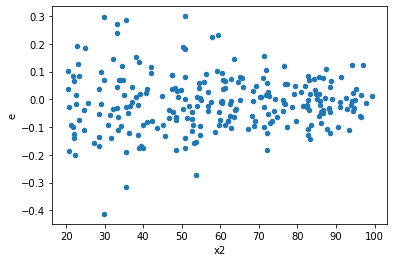

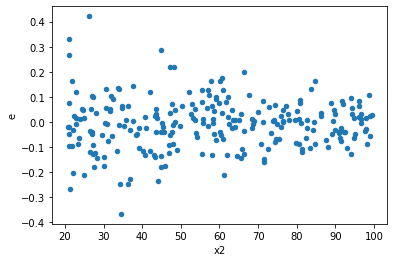

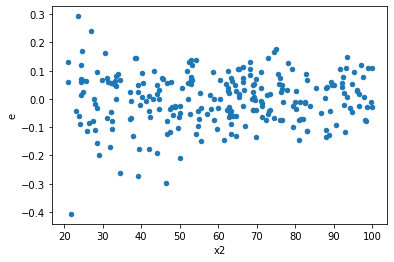

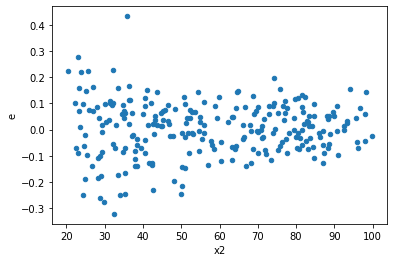

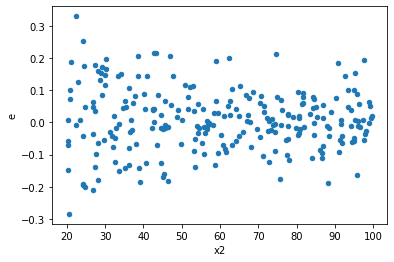

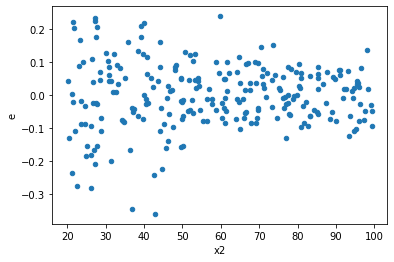

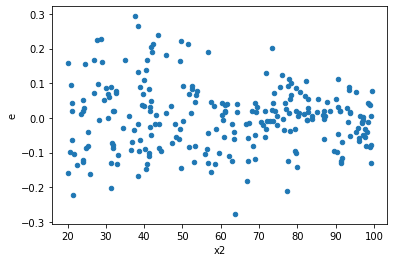

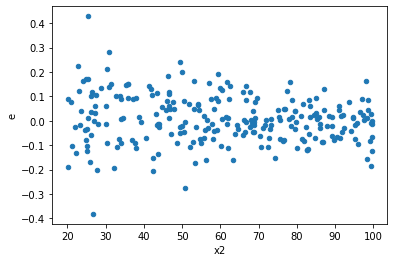

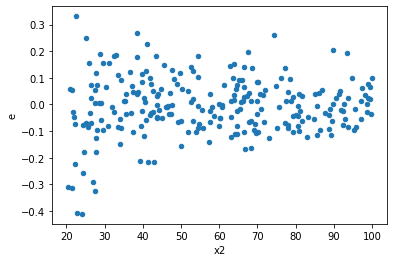

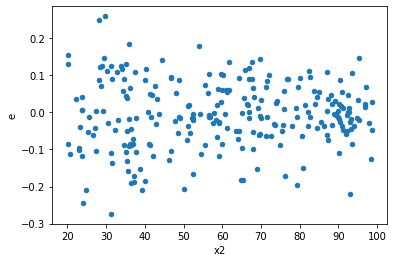

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
110.0,98.0,98.0,0.7542806772022753,0.7718406576482716,0.00769674160410485,0.007875925078043588,1.0232804325720348,0.9095390883339494,0.5452304558330253,0.4547695441669747,Reject005=1 : Homoscedasticity
541.0,98.0,98.0,0.7290525383768541,0.7311717659482063,0.0074393116160903485,0.007460936387226595,1.0029068242133419,0.9885662521192189,0.5057168739403906,0.49428312605960945,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,98.0,98.0,1.3043596051598738,0.5540293290578371,0.013309791889386467,0.005653360500590174,0.4247519831694959,3.106090638936243e-05,Reject005=0 : Heteroscedasticity
1.0,98.0,98.0,1.3025484259924454,0.5533833572642101,0.013291310469310667,0.005646768951675613,0.42484666690420586,3.120465083101864e-05,Reject005=0 : Heteroscedasticity
2.0,98.0,98.0,1.129577450001573,0.5331180774150235,0.011526300510220132,0.005439980381785954,0.4719623939148937,0.0002473634930677503,Reject005=0 : Heteroscedasticity
3.0,98.0,98.0,1.3612991190175423,0.6149007516452184,0.013890807336913696,0.006274497465767534,0.4517014248044147,0.00010707856236831536,Reject005=0 : Heteroscedasticity
4.0,98.0,98.0,1.0819060522747879,0.5617056917618615,0.011039857676273345,0.005731690732263893,0.5191815782718228,0.0013362290445320002,Reject005=0 : Heteroscedasticity
5.0,98.0,98.0,1.1453848243384346,0.5225525096413606,0.011687600248351374,0.0053321684657281695,0.45622440470449127,0.00012993486328268002,Reject005=0 : Heteroscedasticity
6.0,98.0,98.0,1.4142088996254594,0.5490718687007251,0.014430703057402646,0.005602774170415562,0.38825372181305173,4.469871426023539e-06,Reject005=0 : Heteroscedasticity
7.0,98.0,98.0,0.950787771644244,0.5682569457163474,0.009701916037186164,0.005798540262411708,0.5976695984779367,0.011489625587763473,Reject005=0 : Heteroscedasticity
8.0,98.0,98.0,1.234300082042132,0.5881131755051641,0.012594898796348284,0.006001154852093511,0.47647503557817095,0.00029512491016542904,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    951
Reject005=1 : Homoscedasticity       49
Name: Result_test, dtype: int64